In [84]:
# Imports
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from timeit import default_timer as timer

In [85]:
# Parameters 
# DATASET_FILE_PATH: "BigData.xlsx",
# DATASET_SHEET_TITLE: "data_test",
# GRANULARITY: 10, # Take first item, skip next x, take next, skip x, take next, ...
# STEP_SIZE_SLIDING_WINDOW: 5,
# PAST_HISTORY: 20,
# FUTURE_TARGET: 1, 
# Looks at observations that are PASTHISTORY timesteps prior (reading only every STEP_SIZE_SLIDING_WINDOW entry),
# then predicts the result at FUTURETARGET timesteps in the future
# VAL_PERCENT: 0.1,
# TEST_PERCENT: 0.1,
# EPOCHS: 5,
# BATCH_SIZE: 10 # Splits the dataset into batches of this size: we perform gradiant descent once per batch
# SMOOTHING: 0

# runAll(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
#        FUTURE_TARGET, VAL_PERCENT, TEST_PERCENT, EPOCHS, BATCH_SPLITS_TRAIN, BATCH_SPLITS_VAL, SMOOTHING)

In [86]:
def run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
            FUTURE_TARGET, VAL_PERCENT, TEST_PERCENT, EPOCHS, BATCH_SPLITS, SMOOTHING, ATTEMPT_NAME, 
            SHUFFLE_BUFFER_SIZE, MEAN): 
    batch_train, batch_val, batch_test, test_ground_truth, train_slices, val_slices, test_data_indexes, data_shape = process_data(
        DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, SMOOTHING, ATTEMPT_NAME, VAL_PERCENT, PAST_HISTORY, 
        FUTURE_TARGET, STEP_SIZE_SLIDING_WINDOW, BATCH_SPLITS, EPOCHS, SHUFFLE_BUFFER_SIZE, MEAN)
    model, training_history, training_time = run_lstm(data_shape, batch_train, batch_val, train_slices, 
                                                      val_slices, BATCH_SPLITS, EPOCHS, FUTURE_TARGET) 
    evaluate_results(model, training_history, test_ground_truth, batch_test, test_data_indexes, training_time)

In [87]:
# Load algorithm
%run ./data_management_component.ipynb

In [88]:
%run ./lstm_baseline.ipynb

In [89]:
%run ./evaluation_component.ipynb

Working on dataset: Datasets\BigData.xlsx data_test


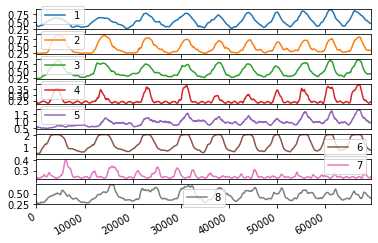

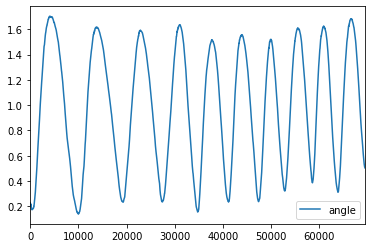

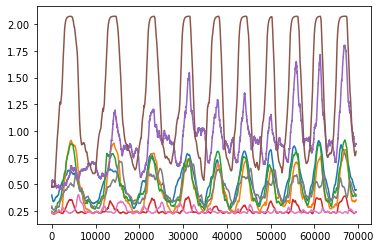

Working on dataset: Datasets\RandomData.xlsx data_Random


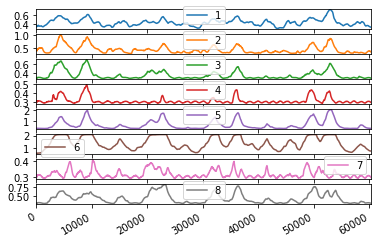

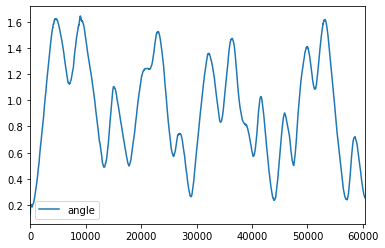

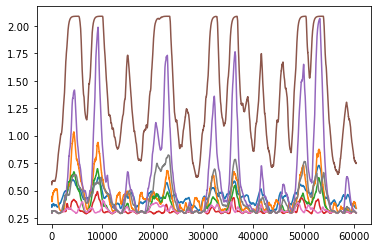

----- TEST SET -----
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 32)                5248      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________
Train for 623 steps, validate for 67 steps
Epoch 1/5
623/623 [==============================] - 20s 32ms/step - loss: 0.0933 - mae: 0.0933 - mape: 15.7715 - mse: 0.0167 - val_loss: 0.1075 - val_mae: 0.1075 - val_mape: 18.1822 - val_mse: 0.0176
Epoch 2/5
623/623 [==============================] - 4s 7ms/step - loss: 0.0666 - mae: 0.0667 - mape: 10.4431 - mse: 0.0075 - val_loss: 0.0948 - val_mae: 0.0948 - val_mape: 11.5661 - val_mse: 0.0129
Epoch 3/5
623/623 [==============================

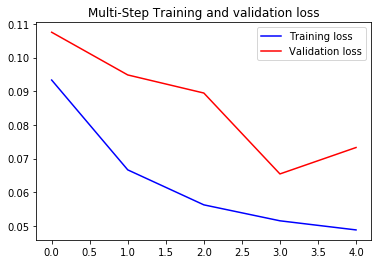

6018/6018 [==============================] - 21s 4ms/step - loss: 0.1475 - mae: 0.1475 - mape: 27.1013 - mse: 0.0332
Total training time: 37.44172139999955 seconds
Execution time: time 1199.0232827999998, observations 6018, time per observation 0.1992394953140578 seconds


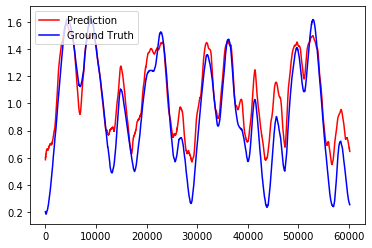

In [90]:
ATTEMPT_NAME="LSTM_BASELINE"
DATASET_FILE_PATH= ["Datasets\\BigData.xlsx", "Datasets\\RandomData.xlsx"]
DATASET_SHEET_TITLE= ["data_test", "data_Random"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=5
PAST_HISTORY=20
FUTURE_TARGET=1
VAL_PERCENT=0.1
TEST_PERCENT=0.1
EPOCHS=5
BATCH_SPLITS=10
SMOOTHING=50
SHUFFLE_BUFFER_SIZE=100
MEAN=False

# Running the algorithm all at once
BASELINE = run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, 
                   PAST_HISTORY, FUTURE_TARGET, VAL_PERCENT, TEST_PERCENT, EPOCHS, BATCH_SPLITS, 
                   SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN)

In [91]:
#batch_train, batch_val, batch_test, test_ground_truth, train_slices, val_slices, test_data_indexes, data_shape = process_data(
#        DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, SMOOTHING, ATTEMPT_NAME, VAL_PERCENT, PAST_HISTORY, 
#        FUTURE_TARGET, STEP_SIZE_SLIDING_WINDOW, BATCH_SPLITS, EPOCHS, SHUFFLE_BUFFER_SIZE, MEAN)

In [92]:
# model, training_history, training_time = run_lstm(data_shape, batch_train, batch_val, train_slices, 
#                                                      val_slices, BATCH_SPLITS, EPOCHS, FUTURE_TARGET) 

In [93]:
# evaluate_results(model, training_history, test_ground_truth, batch_test, test_data_indexes, training_time)